# Materials associated with the paper: 

Cao, W., Williams, S., Flament, N., Zahirovic, S., Scotese, C., and Müller, R. D., 2018. Paleolatitudinal distribution of lithologic indicators of climate in a paleogeographic framework. Geological Magazine, 1-24. doi:10.1017/S0016756818000110.

### This Jupyter notebook is used to generate Figures 9-11 for the paper.

The code in this notebook is written in Python 2.7. It utilises the standard scientific Python modules including numpy, pandas, mpl_toolkits, matplotlib, os, and the open source module 'pygplate' which provides a Python API to the GPlates software (https://www.gplates.org/). Here, the source code has been modified to Python 3.7 by Behnam Sadeghi.

## Import Python modules

In [1]:
import glob, os
os.environ['PROJ_LIB'] = r'C:\ProgramData\Anaconda3\pkgs\proj4-5.1.0-hfa6e2cd_1\Library\share'
from mpl_toolkits.basemap import Basemap
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import pandas as pd    
from matplotlib import colors
from matplotlib import legend
import pygplates
from matplotlib.patches import Polygon
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
#%matplotlib inline

## Figure 9

### Read the input data and make the figure

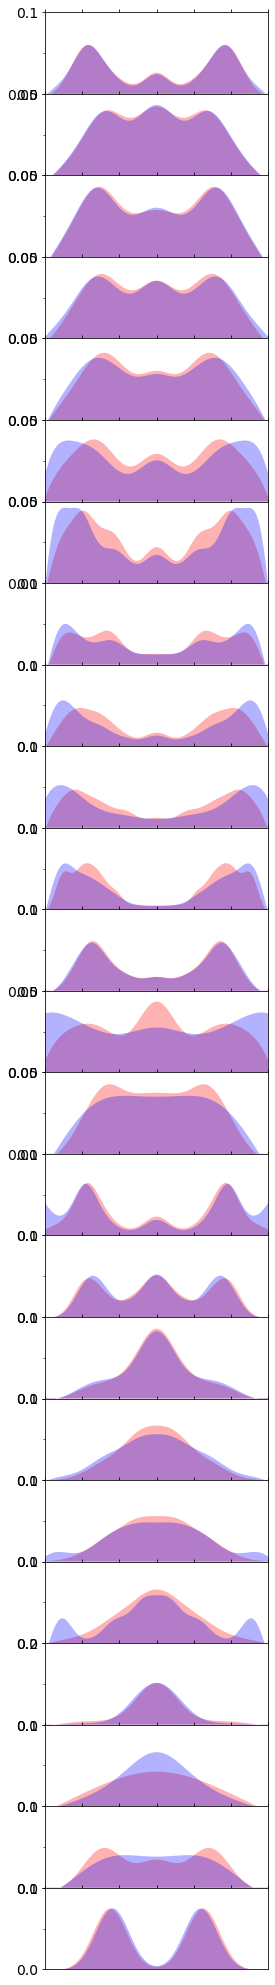

In [2]:
fig, axes = plt.subplots(nrows=24, ncols=1,figsize=(4, 36))

for i in np.arange(0,24,1):
    yedges = np.arange(-90, 91, 5) #latitude
    
    ##############################################
    # Matthews2016
    # Coals
    data_coal_sizer_Matthews2016_withoutAreaCorrected = pd.read_table('../Data/SiZer/LithData/Coals_Only/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    axes[23-i].fill_between(data_coal_sizer_Matthews2016_withoutAreaCorrected.iloc[:,0],0,data_coal_sizer_Matthews2016_withoutAreaCorrected.iloc[:,1],facecolor='red', interpolate=False, alpha=0.3) #, linestyle='--',linewidth=2.0
    #axes[23-i].plot(data_coal_sizer_Matthews2016_withoutAreaCorrected.iloc[:,0],data_coal_sizer_Matthews2016_withoutAreaCorrected.iloc[:,1],color='black',linewidth=2.0) #,

    data_coal_sizer_Matthews2016_AreaCorrected_Normalised = pd.read_table('../Data/SiZer/Coals_Matthews2016/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    axes[23-i].fill_between(data_coal_sizer_Matthews2016_AreaCorrected_Normalised.iloc[:,0],0,data_coal_sizer_Matthews2016_AreaCorrected_Normalised.iloc[:,1],facecolor='blue', interpolate=False, alpha=0.3,linewidth=2.0)
    #axes[23-i].plot(data_coal_sizer_Matthews2016_AreaCorrected_Normalised.iloc[:,0],data_coal_sizer_Matthews2016_AreaCorrected_Normalised.iloc[:,1],color='black',linewidth=2.0,linestyle='--') #,linewidth=2.0
    
    # Evaporites
    #data_sizer_Matthews2016_withoutAreaCorrected = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/3_LithData_Number_InEachBand_SamplingBiasRemoved_Mtthews2016_BinningSize5/Evaporites_OnlySamplingBiasRemoved_Mtthews2016_BinningSize5/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #axes[23-i].fill_between(data_sizer_Matthews2016_withoutAreaCorrected.iloc[:,0],0,data_sizer_Matthews2016_withoutAreaCorrected.iloc[:,1],facecolor='red', interpolate=False, alpha=0.3) #,linewidth=2.0
    #axes[23-i].plot(data_coal_sizer_Matthews2016_withoutAreaCorrected.iloc[:,0],data_coal_sizer_Matthews2016_withoutAreaCorrected.iloc[:,1],color='red',linewidth=2.0) #,

    #data_sizer_Matthews2016_AreaCorrected_Normalised = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Evaporites_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #axes[23-i].fill_between(data_sizer_Matthews2016_AreaCorrected_Normalised.iloc[:,0],0,data_sizer_Matthews2016_AreaCorrected_Normalised.iloc[:,1],facecolor='blue', interpolate=False, alpha=0.3) #,linewidth=2.0
    #axes[23-i].plot(data_coal_sizer_Matthews2016_AreaCorrected_Normalised.iloc[:,0],data_coal_sizer_Matthews2016_AreaCorrected_Normalised.iloc[:,1],color='blue',linewidth=2.0) #,linewidth=2.0
    
    '''
    # Glacial
    data_sizer_Matthews2016 = '/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/3_LithData_Number_InEachBand_SamplingBiasRemoved_Mtthews2016_BinningSize5/Glacial_OnlySamplingBiasRemoved_Mtthews2016_BinningSize5/Data_XY_BestFitting_'+str(i)+'.txt'
    if os.path.isfile(data_sizer_Matthews2016):
        data_sizer_Matthews2016 = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/3_LithData_Number_InEachBand_SamplingBiasRemoved_Mtthews2016_BinningSize5/Glacial_OnlySamplingBiasRemoved_Mtthews2016_BinningSize5/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
        #axes[23-i].plot(data_coal_sizer.iloc[:,0],data_coal_sizer.iloc[:,1],'black',linewidth=2.0)
        axes[23-i].fill_between(data_sizer_Matthews2016.iloc[:,0],0,data_sizer_Matthews2016.iloc[:,1]/np.sum(data_sizer_Matthews2016.iloc[:,1]),facecolor='yellow', interpolate=False, alpha=0.3) #,linewidth=2.0
    else:
        print "No data"
    
    data_sizer_Matthews2016 = '/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Glacial_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt'
    if os.path.isfile(data_sizer_Matthews2016):
        data_sizer_Matthews2016 = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Glacial_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
        #axes[23-i].plot(data_coal_sizer.iloc[:,0],data_coal_sizer.iloc[:,1],'black',linewidth=2.0)
        axes[23-i].fill_between(data_sizer_Matthews2016.iloc[:,0],0,data_sizer_Matthews2016.iloc[:,1]/np.sum(data_sizer_Matthews2016.iloc[:,1]),facecolor='blue', interpolate=False, alpha=0.3) #,linewidth=2.0
    else:
        print ("No data")
    '''
    
    axes[23-i].set_xticks(np.arange(-90, 91, 30))
    axes[23-i].set_xticklabels([])
    axes[23-i].set_xlim((90,-90))
    axes[23-i].set_ylim(ymin=0)
    #axes[23-i].set_ylim((0,0.014))
    axes[23-i].xaxis.set_tick_params(direction='out') #labelsize=12,
    #plt.setp(axes[i].get_xticklabels(), fontsize=12.) #,rotation=50
    axes[23-i].yaxis.set_tick_params(labelsize=14,direction='out') #
    axes[23-i].xaxis.set_ticks_position('top') # bottom
    axes[23-i].set_yticks(axes[23-i].get_yticks()[::2]) # set the major ticks
    interval = np.diff(axes[23-i].get_yticks())[0]
    axes[23-i].yaxis.set_minor_locator(MultipleLocator(interval/2))
    axes[23-i].tick_params(which = 'both', direction = 'out') # if only want to set y-axis: axes[1,2].yaxis.set_tick_params(labelsize=12,direction='out')
    axes[23-i].yaxis.set_ticks_position('left')
    
    
fig.subplots_adjust(hspace=0.00)
plt.savefig('Output/Fig_09.pdf')
plt.show()

## Figure 10

### Read the data and make the figure

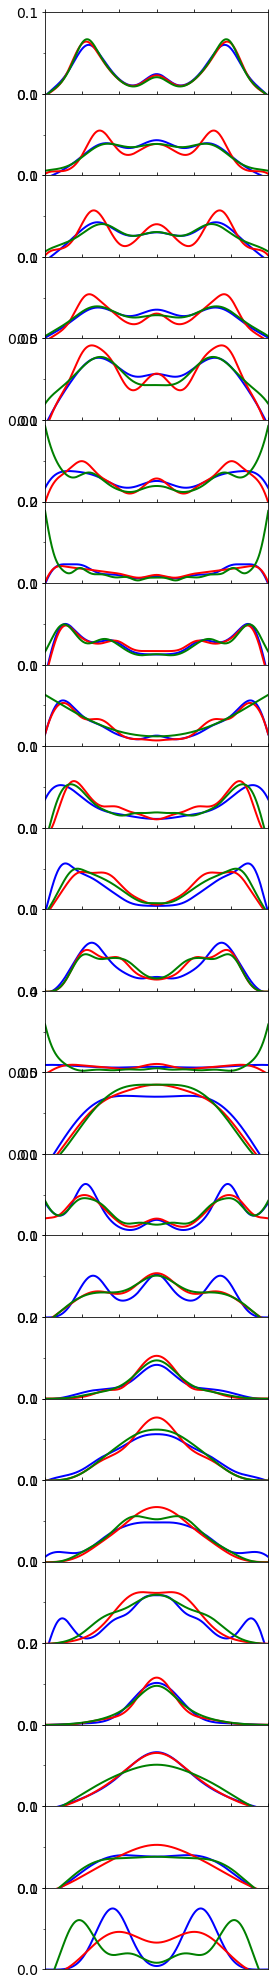

In [3]:
fig, axes = plt.subplots(nrows=24, ncols=1,figsize=(4, 36))

for i in np.arange(0,24,1):
    yedges = np.arange(-90, 91, 5) #latitude
    
    ##############################################
    # Matthews2016
    # Coals
    data_coal_sizer_Matthews2016 = pd.read_table('../Data/SiZer/Coals_Matthews2016/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #axes[23-i].fill_between(data_coal_sizer_Matthews2016.iloc[:,0],0,data_coal_sizer_Matthews2016.iloc[:,1]/np.sum(data_coal_sizer_Matthews2016.iloc[:,1]),facecolor='blue', interpolate=False, alpha=0.3) #,linewidth=2.0
    axes[23-i].plot(data_coal_sizer_Matthews2016.iloc[:,0],data_coal_sizer_Matthews2016.iloc[:,1],color='blue',linewidth=2.0) #,
    
    # Evaporites
    #data_coal_sizer_Matthews2016 = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Coals_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #data_coal_sizer_Matthews2016 = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Evaporites_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #axes[23-i].fill_between(data_coal_sizer_Matthews2016.iloc[:,0],0,data_coal_sizer_Matthews2016.iloc[:,1]/np.sum(data_coal_sizer_Matthews2016.iloc[:,1]),facecolor='blue', interpolate=False, alpha=0.3) #,linewidth=2.0
    #axes[23-i].plot(data_coal_sizer_Matthews2016.iloc[:,0],data_coal_sizer_Matthews2016.iloc[:,1],color='blue',linewidth=2.0) #,

    # Glacial
    #data_sizer_Matthews2016 = '/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Glacial_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt'
    #if os.path.isfile(data_sizer_Matthews2016):
    #    data_sizer_Matthews2016 = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Glacial_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #    axes[23-i].plot(data_sizer_Matthews2016.iloc[:,0],data_sizer_Matthews2016.iloc[:,1],'blue',linewidth=2.0)
    #    # normalise results: data_sizer_Matthews2016.iloc[:,1]/np.sum(data_sizer_Matthews2016.iloc[:,1])
    ##    axes[23-i].fill_between(data_sizer_Matthews2016.iloc[:,0],0,data_sizer_Matthews2016.iloc[:,1]/np.sum(data_sizer_Matthews2016.iloc[:,1]),facecolor='blue', interpolate=False, alpha=0.3) #,linewidth=2.0
    #else:
    #    print ("No data")
    
    ##############################################
    # Scotese2008
    # Coals
    data_sizer_Scotese2008 = pd.read_table('../Data/SiZer/Coals_Scotese2008/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #axes[23-i].fill_between(data_sizer_Scotese2008.iloc[:,0],0,data_sizer_Scotese2008.iloc[:,1],facecolor='red', interpolate=False, alpha=0.3) #,linewidth=2.0
    axes[23-i].plot(data_sizer_Scotese2008.iloc[:,0],data_sizer_Scotese2008.iloc[:,1],color='red',linewidth=2.0) #,
    
    # Evaporites
    #data_sizer_Scotese2008 = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Evaporites_Scotese2008_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #axes[23-i].fill_between(data_sizer_Scotese2008.iloc[:,0],0,data_sizer_Scotese2008.iloc[:,1],facecolor='red', interpolate=False, alpha=0.3) #,linewidth=2.0
    #axes[23-i].plot(data_sizer_Scotese2008.iloc[:,0],data_sizer_Scotese2008.iloc[:,1],color='red',linewidth=2.0) #,

    # Glacial
    #data_sizer_Scotese2008 = '/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Glacial_Scotese2008_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt'
    #if os.path.isfile(data_sizer_Scotese2008):
    #    data_sizer_Scotese2008 = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Glacial_Scotese2008_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #    axes[23-i].plot(data_sizer_Scotese2008.iloc[:,0],data_sizer_Scotese2008.iloc[:,1],'red',linewidth=2.0)
    ##     axes[23-i].fill_between(data_sizer_Scotese2008.iloc[:,0],0,data_sizer_Scotese2008.iloc[:,1]/np.sum(data_sizer_Scotese2008.iloc[:,1]),facecolor='red', interpolate=False, alpha=0.3) #,linewidth=2.0
    #else:
    #    print ("No data")
    
    
    ##############################################
    # Golonka model
    # Coals
    data_sizer_Golonka = pd.read_table('../Data/SiZer/Coals_Golonka/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #axes[23-i].fill_between(data_sizer_Golonka.iloc[:,0],0,data_sizer_Golonka.iloc[:,1],facecolor='red', interpolate=False, alpha=0.3) #,linewidth=2.0
    axes[23-i].plot(data_sizer_Golonka.iloc[:,0],data_sizer_Golonka.iloc[:,1],color='green',linewidth=2.0) #,

    # Evaporites
    #data_sizer_Golonka = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Evaporites_Golonka_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #axes[23-i].fill_between(data_sizer_Golonka.iloc[:,0],0,data_sizer_Golonka.iloc[:,1],facecolor='red', interpolate=False, alpha=0.3) #,linewidth=2.0
    #axes[23-i].plot(data_sizer_Golonka.iloc[:,0],data_sizer_Golonka.iloc[:,1],color='green',linewidth=2.0) #,

    # Glacial
    #data_sizer_Golonka = '/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Glacial_Golonka_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt'
    #if os.path.isfile(data_sizer_Golonka):
    #    data_sizer_Golonka = pd.read_table('/Users/wenchaocao/Research/33_MatLab/Library/Feature_modified/Smoothing/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Glacial_Golonka_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled_BinningSize5_Normalised/Data_XY_BestFitting_'+str(i)+'.txt',header=None, delimiter=r"\s+")
    #    axes[23-i].plot(data_sizer_Golonka.iloc[:,0],data_sizer_Golonka.iloc[:,1],'green',linewidth=2.0)
    ##     axes[23-i].fill_between(data_sizer_Golonka.iloc[:,0],0,data_sizer_Golonka.iloc[:,1]/np.sum(data_sizer_Golonka.iloc[:,1]),facecolor='red', interpolate=False, alpha=0.3) #,linewidth=2.0
    #else:
    #    print ("No data")
    
    
    axes[23-i].set_xticks(np.arange(-90, 91, 30))
    axes[23-i].set_xticklabels([])
    axes[23-i].set_xlim((90,-90))
    axes[23-i].set_ylim(ymin=0)
    #axes[23-i].set_ylim((0,0.01))
    axes[23-i].xaxis.set_tick_params(direction='out') #labelsize=12,
    #plt.setp(axes[i].get_xticklabels(), fontsize=12.) #,rotation=50
    axes[23-i].yaxis.set_tick_params(labelsize=14,direction='out') #
    axes[23-i].xaxis.set_ticks_position('top') # bottom
    axes[23-i].set_yticks(axes[23-i].get_yticks()[::2]) # set the major ticks
    interval = np.diff(axes[23-i].get_yticks())[0]
    axes[23-i].yaxis.set_minor_locator(MultipleLocator(interval/2))
    axes[23-i].tick_params(which = 'both', direction = 'out') # if only want to set y-axis: axes[1,2].yaxis.set_tick_params(labelsize=12,direction='out')
    axes[23-i].yaxis.set_ticks_position('left')
    
    
fig.subplots_adjust(hspace=0.00)
plt.savefig('Output/Fig_10.pdf')
plt.show()

## Figure 11

### Read the data and make the figure

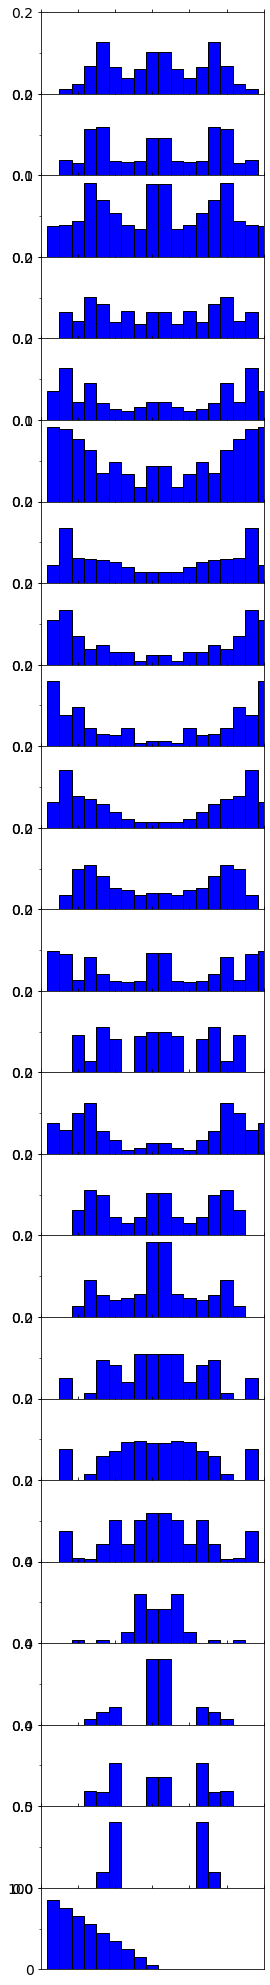

<Figure size 432x288 with 0 Axes>

In [4]:
#######################
# Matthews2016 model, bin size: 10 degree
# Coals
data_raw_Matthews2016 = pd.read_excel('../Data/Lithologic_Data/LithData_TwoBiasRemoved/Coals_Matthews2016_Size10_Normalised.xlsx')
data_Matthews2016_BinningSize10 = np.array(data_raw_Matthews2016)

fig, axes = plt.subplots(nrows=24, ncols=1,figsize=(4, 36))

for i in np.arange(0,24,1):
    
    ################################################
    # binning size: 10 degree
    yedges_binningsize10 = np.arange(-90, 91, 10) #latitude, specify the bin size   

    # Coals, evaporites and glacial deposits
    axes[23-i].bar(np.array(yedges_binningsize10[:-1]), data_Matthews2016_BinningSize10[:,i], width=10, color='blue', edgecolor='black') #,linewidth=0.5, edgecolor='grey',alpha=0.4
    
    axes[23-i].set_xticks(np.arange(-90, 91, 30))
    axes[23-i].set_xticklabels([])
    axes[23-i].set_xlim((90,-90))
    axes[23-i].set_ylim(ymin=0)
    axes[23-i].xaxis.set_tick_params(direction='out') #labelsize=12,
    #plt.setp(axes[i].get_xticklabels(), fontsize=12.) #,rotation=50

    axes[23-i].yaxis.set_tick_params(labelsize=14,direction='out') #
    axes[23-i].xaxis.set_ticks_position('top') # bottom
    axes[23-i].set_yticks(axes[23-i].get_yticks()[::2]) # set the major ticks
    interval = np.diff(axes[23-i].get_yticks())[0]
    axes[23-i].yaxis.set_minor_locator(MultipleLocator(interval/2))
    axes[23-i].tick_params(which = 'both', direction = 'out') # if only want to set y-axis: axes[1,2].yaxis.set_tick_params(labelsize=12,direction='out')
    axes[23-i].yaxis.set_ticks_position('left')

fig.subplots_adjust(hspace=0.00)
plt.show()
plt.savefig('Output/Fig_11.pdf')

